# preprocessing the fatched data from APIs

## importing needed libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pickle

## reading csv file that has been merged from all fetched csv datasets and then performing preprocessing tasks

### removing null/ replacing with other defualt vales
### removing outliers that may effect the performance of model
### deleting unneccesary and unwanted data columns from the dataset and making dataset smooth
### some preprocessing tasks like removing unwanted columns is also done from direct csv file

In [2]:
df = pd.read_csv("newdata/finalmerge.csv")

In [3]:
del df['description']
del df['Unnamed: 0']

In [4]:
df

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile,Target
0,False,4,588,0,Thu Sep 08 13:20:35 +0000 2011,16,False,False,24,False,True,False,0
1,False,57,693,0,Sun May 03 07:35:13 +0000 2009,597,False,False,656,False,True,True,0
2,False,15,104,0,Sun Sep 06 19:50:08 +0000 2009,1150,True,False,1234,False,True,False,0
3,False,14,227,0,Fri Oct 16 14:02:48 +0000 2009,530,False,False,573,False,True,False,0
4,False,18,519,0,Sun Jan 31 12:08:41 +0000 2010,653,False,False,675,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,False,4,51,0,Tue Jan 19 16:58:50 +0000 2021,6,False,False,6,False,True,True,1
1039,False,146,205,0,Fri Sep 25 07:18:47 +0000 2020,3009,False,False,503,False,True,True,1
1040,False,17,58,1,Sat May 15 08:03:12 +0000 2021,31,False,False,2,False,True,True,1
1041,False,21,139,0,Sat Oct 24 11:34:06 +0000 2020,101,True,False,63,False,True,True,1


## transformation of colunms to given mapp

In [5]:
temp = df['created_at']
templist = []
# df['created_at'] = df['created_at'].str.extract('d{4}$', expand=False).str.strip()
for i in df['created_at']:
    
    templist.append(int(2021) - int(i.split()[5]))
#     print(int(2021) - int(i.split()[5]))

df['created_at'] = templist
df

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile,Target
0,False,4,588,0,10,16,False,False,24,False,True,False,0
1,False,57,693,0,12,597,False,False,656,False,True,True,0
2,False,15,104,0,12,1150,True,False,1234,False,True,False,0
3,False,14,227,0,12,530,False,False,573,False,True,False,0
4,False,18,519,0,11,653,False,False,675,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,False,4,51,0,0,6,False,False,6,False,True,True,1
1039,False,146,205,0,1,3009,False,False,503,False,True,True,1
1040,False,17,58,1,0,31,False,False,2,False,True,True,1
1041,False,21,139,0,1,101,True,False,63,False,True,True,1


## data transformation: mapping true and false data values with numerical quantitaive data 

In [6]:
df = df.replace({
    True: 1,
    False: 0,
})
df

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile,Target
0,0,4,588,0,10,16,0,0,24,0,1,0,0
1,0,57,693,0,12,597,0,0,656,0,1,1,0
2,0,15,104,0,12,1150,1,0,1234,0,1,0,0
3,0,14,227,0,12,530,0,0,573,0,1,0,0
4,0,18,519,0,11,653,0,0,675,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0,4,51,0,0,6,0,0,6,0,1,1,1
1039,0,146,205,0,1,3009,0,0,503,0,1,1,1
1040,0,17,58,1,0,31,0,0,2,0,1,1,1
1041,0,21,139,0,1,101,1,0,63,0,1,1,1


## final pre-processed dataset ready for model training

In [7]:
df

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile,Target
0,0,4,588,0,10,16,0,0,24,0,1,0,0
1,0,57,693,0,12,597,0,0,656,0,1,1,0
2,0,15,104,0,12,1150,1,0,1234,0,1,0,0
3,0,14,227,0,12,530,0,0,573,0,1,0,0
4,0,18,519,0,11,653,0,0,675,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0,4,51,0,0,6,0,0,6,0,1,1,1
1039,0,146,205,0,1,3009,0,0,503,0,1,1,1
1040,0,17,58,1,0,31,0,0,2,0,1,1,1
1041,0,21,139,0,1,101,1,0,63,0,1,1,1


## spliting entire dataset in training and test splits for model training and model accuracy evaluation

In [8]:
Y = df['Target']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1038    1
1039    1
1040    1
1041    1
1042    1
Name: Target, Length: 1043, dtype: int64

In [9]:
X = df.drop('Target', axis= 1)
X

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile
0,0,4,588,0,10,16,0,0,24,0,1,0
1,0,57,693,0,12,597,0,0,656,0,1,1
2,0,15,104,0,12,1150,1,0,1234,0,1,0
3,0,14,227,0,12,530,0,0,573,0,1,0
4,0,18,519,0,11,653,0,0,675,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1038,0,4,51,0,0,6,0,0,6,0,1,1
1039,0,146,205,0,1,3009,0,0,503,0,1,1
1040,0,17,58,1,0,31,0,0,2,0,1,1
1041,0,21,139,0,1,101,1,0,63,0,1,1


## spliting preprocessed dataset into train for model training and test for model testing and accuracy measurement

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # 80% training and 20% test

In [11]:
clf = RandomForestClassifier(n_estimators =  600)

clf.fit(X_train, y_train)
# clf.predict_proba(test[features])[:]

preds = clf.predict(X_test)
# preds = clf.target_names[clf.predict(test[features])]
print(preds)

[1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0]


## evaluating accuracy

In [12]:
score = clf.score(X_test, y_test)
print(score)

0.8564593301435407


## cross validation 

In [13]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, X, Y, scoring='accuracy', cv = 10)
print(accuracy)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.43809524 0.81904762 0.95238095 0.96153846 0.94230769 0.96153846
 0.95192308 0.98076923 0.79807692 0.52884615]
Accuracy of Model with Cross Validation is: 83.34523809523809


## hyper parameter tuning for model performance and accuracy improvement

In [14]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [100, 400, 600]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
random_forest = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)

random_forest.fit(X,Y)
#random_forest.cv_results_


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 400, 600]})

In [15]:
fd=pd.DataFrame(random_forest.cv_results_)
fd

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318664,0.033171,0.026499,0.010068,10,auto,100,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.775862,0.916667,0.795389,0.829306,0.062286,6
1,1.060849,0.098489,0.088567,0.007367,10,auto,400,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.770115,0.919540,0.798271,0.829309,0.064830,4
2,1.521468,0.053025,0.119819,0.007367,10,auto,600,"{'max_depth': 10, 'max_features': 'auto', 'n_e...",0.772989,0.922414,0.798271,0.831224,0.065302,2
3,0.287600,0.048763,0.023647,0.006373,10,sqrt,100,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.775862,0.931034,0.792507,0.833135,0.069558,1
4,1.203028,0.066266,0.089788,0.003319,10,sqrt,400,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.772989,0.916667,0.798271,0.829309,0.062628,4
5,2.124393,0.081806,0.159675,0.029396,10,sqrt,600,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.772989,0.922414,0.798271,0.831224,0.065302,2
6,0.398203,0.090375,0.034677,0.009979,20,auto,100,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.775862,0.847701,0.786744,0.803436,0.031614,20
7,1.710595,0.475982,0.159479,0.097584,20,auto,400,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.778736,0.841954,0.786744,0.802478,0.028105,24
8,1.991107,0.249877,0.153004,0.029049,20,auto,600,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",0.775862,0.862069,0.786744,0.808225,0.038332,8
9,0.329611,0.011266,0.025752,0.007304,20,sqrt,100,"{'max_depth': 20, 'max_features': 'sqrt', 'n_e...",0.772989,0.839080,0.789625,0.800565,0.028069,29


In [16]:
random_forest.best_score_

0.8331345854450296

In [17]:
random_forest.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

## Model training after finding new parameters which are best for accuracy

In [19]:
clf = RandomForestClassifier(max_depth = 10, max_features =  'sqrt',n_estimators =  400)

clf.fit(X_train, y_train)
# clf.predict_proba(test[features])[:]

preds = clf.predict(X_test)
# preds = clf.target_names[clf.predict(test[features])]
print(preds)

[1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0
 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0]


## Evaluating accuracy on New model

In [20]:
score = clf.score(X_test, y_test)
print(score)

0.8803827751196173


## Saving model for further use

In [21]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Testing on random user by entering userid at runtime

## making twitter API object for target user's data extraction

In [22]:
consumer_key = "uI8rlEbmxT108GTsVH4OX0SQi" 
consumer_secret = "mn5GPEYvyZE0NoZ6lV1GEB6iszs1R9PXsfxZLGPvVcyhm44FOb"
access_key = "1433079307811766278-X5jzunomTlbMVX4Fxvul7nkLacKqyN"
access_secret = "c6QWgpx34jce0QiVkVsrBF1cDJ6JyS3vqVm4AyO7od3H1"

# Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_key, access_secret) 
  
# Creating an API object 
api = tweepy.API(auth)

## takin input as userid to predict trustworthiness of user

In [23]:
inputuserid = input("Enter userid= ")

Enter userid= BillGates


## extracting user data 

In [24]:
info = {}

new_tweets = tweepy.Cursor(api.user_timeline, screen_name=inputuserid, tweet_mode='extended').items(10)
arcgishub_tweets = []
for tweet in new_tweets:
    arcgishub_tweets.append(tweet._json) 
user = arcgishub_tweets[0]
    
dic = user['user']
dic.pop('entities')
info[inputuserid] = dic

## making dataframe from extracted JSON file to give input for prediction of trustworthiness

In [25]:
inpdf = pd.DataFrame(info)

In [26]:
inpdf = inpdf.transpose()

## Preprocessing input data

In [27]:
inpdf = inpdf[['protected',
 'followers_count',
 'friends_count',
 'listed_count',
 'created_at',
 'favourites_count',
 'geo_enabled',
 'verified',
 'statuses_count',
 'contributors_enabled',
 'has_extended_profile',
 'default_profile']]

In [28]:
temp = inpdf['created_at']
templist = []
# df['created_at'] = df['created_at'].str.extract('d{4}$', expand=False).str.strip()
for i in inpdf['created_at']:
    
    templist.append(int(2021) - int(i.split()[5]))
#     print(int(2021) - int(i.split()[5]))

inpdf['created_at'] = templist
inpdf

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile
BillGates,False,56351911,342,121562,12,192,False,True,3731,False,False,False


In [29]:
inpdf = inpdf.replace({
    True: 1,
    False: 0,
})
inpdf

,protected,followers_count,friends_count,listed_count,created_at,favourites_count,geo_enabled,verified,statuses_count,contributors_enabled,has_extended_profile,default_profile
BillGates,0,56351911,342,121562,12,192,0,1,3731,0,0,0


## Making prediction from input data

In [30]:
preds = clf.predict(inpdf)

#print("Predicted output for trustworthiness: ",preds)


## performing text classification for positive, negative or nutral score of tweets and bio descriptions

In [31]:
data1 = [[arcgishub_tweets[0]['user']['description']]]

df2 = pd.DataFrame(data1,columns = ['Tweets'])
print(df2)

                                              Tweets
0  Sharing things I'm learning through my foundat...


##  Extract 100 tweets from the twitter user

In [32]:

posts = api.user_timeline(screen_name=inputuserid, count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: lang


Show the 5 recent tweets:

1) The groundbreaking RTS,S vaccine will help save tens of thousands of children and is paving the way for a new pipeline of tools to #EndMalaria. https://t.co/IKnNlwHuPP

2) Robots will play a huge part in our future, and fiction like Kazuo Ishiguro's Klara and the Sun is a great way to explore what that might mean. https://t.co/qlotAHk0ST

3) Accelerating long-duration energy storage innovation can significantly reduce annual CO2 emissions and lay the foundation for a net-zero economy by 2050. https://t.co/P2I5OcQEXa

4) The @gatesfoundation is supporting GIISER which is working to increase the in-country capacity for rapid evaluation of variants on the African continent. This will help us better understand variants of concern and how the current vaccines may perform. https://t.co/yz9XWS4LWH

5) South Africa did the right thing by reporting these cases. They have invested heavily in R&amp;D including genomic sequencing capabilities which have made it possib

## Create a dataframe with a column called Tweets

In [33]:

df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df = df.append(df2,ignore_index = True)
# Show the first 5 rows of data
df.head()

,Tweets
0,"The groundbreaking RTS,S vaccine will help sav..."
1,"Robots will play a huge part in our future, an..."
2,Accelerating long-duration energy storage inno...
3,The @gatesfoundation is supporting GIISER whic...
4,South Africa did the right thing by reporting ...


## Create a function to clean the tweets

In [34]:

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
    return text



## Clean the tweets

In [35]:

df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"The groundbreaking RTS,S vaccine will help sav..."
1,"Robots will play a huge part in our future, an..."
2,Accelerating long-duration energy storage inno...
3,The is supporting GIISER which is working to ...
4,South Africa did the right thing by reporting ...
...,...
96,A global response will help the world end the ...
97,Earlier I shared three actions that leaders co...
98,"If we want to stop Alzheimer’s disease, one of..."
99,There are three things that can be done in the...


## Create a function to get the subjectivity

In [36]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"The groundbreaking RTS,S vaccine will help sav...",0.454545,0.136364
1,"Robots will play a huge part in our future, an...",0.615625,0.221875
2,Accelerating long-duration energy storage inno...,0.875000,0.375000
3,The is supporting GIISER which is working to ...,0.287500,0.187500
4,South Africa did the right thing by reporting ...,0.607143,0.183810
...,...,...,...
96,A global response will help the world end the ...,0.480000,0.320000
97,Earlier I shared three actions that leaders co...,0.500000,0.250000
98,"If we want to stop Alzheimer’s disease, one of...",0.375000,0.375000
99,There are three things that can be done in the...,0.500000,0.200000


## word cloud visualization

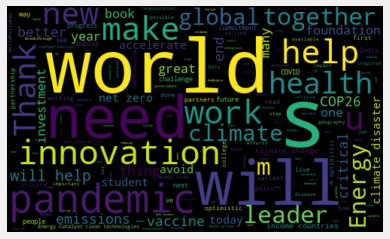

In [37]:

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Create a function to compute negative (-1), neutral (0) and positive (+1) analysis

In [60]:
preds = float(preds)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df



,Tweets,Subjectivity,Polarity,Analysis
0,What if your smart phone could detect Alzheime...,0.642857,0.214286,Positive
1,India is a great example of a country that has...,0.750000,0.800000,Positive
2,Expanding the geography of vaccine manufacturi...,0.650000,0.250000,Positive
3,"Thanks for having me on the show, ! And thanks...",0.450000,0.037500,Positive
4,"In our recent Goalkeepers report, we share som...",0.250000,0.000000,Neutral
...,...,...,...,...
96,": As a physician, I’ve seen too many colleague...",0.750000,0.250000,Positive
97,Polio tools and infrastructure are also critic...,0.532702,0.151894,Positive
98,These young leaders make me optimistic that br...,0.400000,0.100000,Positive
99,"Against the odds, 8 became a doctor and is hel...",0.750000,0.750000,Positive


# Printing positive tweets 

In [49]:

print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) What if your smart phone could detect Alzheimer’s? 's Diagnostics Accelerator is working to make this a reality: 

2) India is a great example of a country that has invested in its capacity. Today 2/3rds of all the world's children receive a vaccine that was made in India: 

3) Expanding the geography of vaccine manufacturing to better meet vaccine needs, both for pandemics and routine immunization, is a critical task. 

4) Thanks for having me on the show, ! And thanks to the all of the late night hosts for focusing on this critical challenge. I’m optimistic that we can come together to avoid a climate disaster. 

5) Thanks for the conversation and for your leadership in helping to end this pandemic and prevent the next one. 

6) A global response will help the world end the COVID crisis. I'm glad to see so many leaders coming together at this U.S.-led virtual Global COVID-19 summit, and look forward to their continued efforts to help the world move out o

# Printing negative tweets

In [50]:
  
print('Printing negative tweets:\n')
j=1

sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) More than 80% of COVID-19 vaccines have been administered in high- and upper-middle-income countries while less than 1% have been administered in low-income countries. This is both profoundly unfair and hinders progress towards ending the pandemic:  

2) When the pandemic hit, many feared the worst when it came to maintaining progress on fighting other diseases. But all over the world people stepped up to avert the worst-case scenarios. One example is malaria:  

3) Over the years, I’ve shared a stage with a jar of human feces, smelled pit latrine odor, and drunk water made from poop (and convinced  to drink it too). Was it worth it? You bet. Here’s why: 

4) Sharing things I'm learning through my foundation work and other interests.



# Plotting 

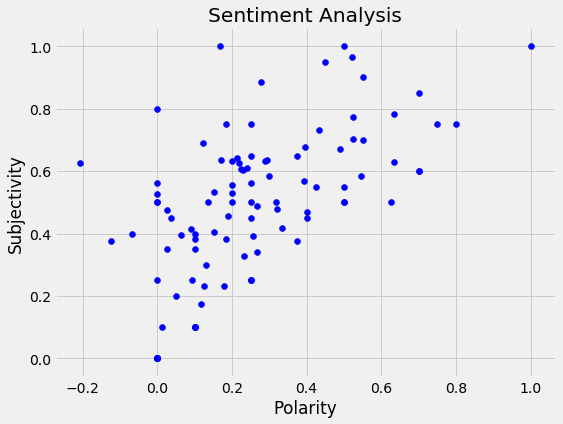

In [51]:

plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Print the percentage of positive tweets

In [52]:

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

positivecount = round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)
print(positivecount)

84.2


# Print the percentage of negative tweets

In [53]:

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


4.0

# Show the value counts

In [54]:

df['Analysis'].value_counts()


Positive    85
Neutral     12
Negative     4
Name: Analysis, dtype: int64

# Plotting and visualizing the counts

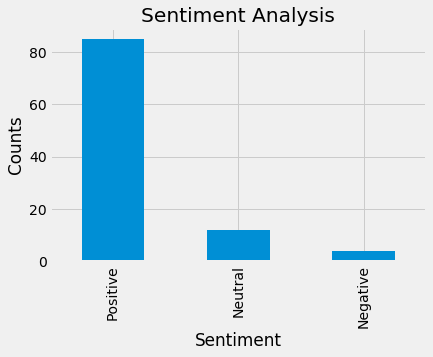

In [55]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

# Final output

#### here 1.0 means user is trustworthy and 0.0 means user is not trustworthy

In [61]:
avgscore = (preds + (positivecount/100))/2

print(inputuserid,"is trustworthy from user's profile is ",preds)
print(inputuserid," classification score is ", positivecount/100)

print("Probability that ",inputuserid, "is trustworthee is",avgscore)

BillGates is trustworthy from user's profile is  1.0
BillGates  classification score is  0.8420000000000001
Probability that  BillGates is trustworthee is 0.921
